<a href="https://colab.research.google.com/github/sairithwikredddy/EX_AI_LAB-_ASS/blob/main/Ex_AL_AS_3_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Question 1**

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/electricity_bill_dataset.csv')
df

,Fan,Refrigerator,AirConditioner,Television,Monitor,MotorPump,Month,City,Company,MonthlyHours,TariffRate,ElectricityBill
0,16,23.0,2.0,6.0,1.0,0,10,Hyderabad,Tata Power Company Ltd.,384,8.4,3225.6
1,19,22.0,2.0,3.0,1.0,0,5,Vadodara,NHPC,488,7.8,3806.4
2,7,20.0,2.0,6.0,7.0,0,7,Shimla,Jyoti Structure,416,7.7,3203.2
3,7,22.0,3.0,21.0,1.0,0,6,Mumbai,Power Grid Corp,475,9.2,4370.0
4,11,23.0,2.0,11.0,1.0,0,2,Mumbai,Ratnagiri Gas and Power Pvt. Ltd. (RGPPL),457,9.2,4204.4
...,...,...,...,...,...,...,...,...,...,...,...,...
45340,18,22.0,3.0,22.0,1.0,0,9,Ahmedabad,Maha Transco – Maharashtra State Electricity T...,764,7.9,6035.6
45341,23,23.0,2.0,6.0,12.0,0,2,New Delhi,Orient Green,572,8.5,4862.0
45342,22,22.0,2.0,20.0,1.0,0,1,New Delhi,GE T&D India Limited,609,8.5,5176.5
45343,8,21.0,2.0,22.0,7.0,0,12,Ratnagiri,TransRail Lighting,748,7.4,5535.2


In [ ]:
features = df[['Fan', 'Refrigerator', 'AirConditioner', 'Television', 'Monitor', 'MotorPump', 'MonthlyHours', 'TariffRate']]
target = df['ElectricityBill']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

model = GradientBoostingRegressor()
model.fit(X_train, y_train)

GradientBoostingRegressor()

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R2) Score: {r2}')

Mean Squared Error (MSE): 500.91883882619226
R-squared (R2) Score: 0.9995603734502971


In [ ]:
features = df[['Fan', 'Refrigerator', 'AirConditioner', 'Television', 'Monitor', 'MotorPump', 'MonthlyHours', 'TariffRate']]
target = df['ElectricityBill']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

**Reasoning**:
The previous command failed because the 'lime' library is not installed. Install the library using pip.



In [ ]:
!pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 5.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=42a1eee94e417fa9d0862251c5bbb66dce5bc6d8a50cd7b4cfbc730fff54c90f
  Stored in directory: /root/.cache/pip/wheels/e7/5d/0e/4b4fff9a47468fed5633211fb3b76d1db43fe806a17fb7486a
Successfully built lime


**Reasoning**:
Now that the 'lime' library is installed, retry importing it and training the base model and explainer.



In [ ]:
from lime.lime_tabular import LimeTabularExplainer
from sklearn.ensemble import RandomForestRegressor

# Train a base model for LIME to explain
base_model = RandomForestRegressor(n_estimators=100, random_state=42)
base_model.fit(X_train, y_train)

# Instantiate LimeTabularExplainer
explainer = LimeTabularExplainer(training_data=X_train.values,
                                 feature_names=X_train.columns,
                                 class_names=['ElectricityBill'],
                                 mode='regression')

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = base_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R2) Score: {r2}')

Mean Squared Error (MSE): 23.801012703606137
R-squared (R2) Score: 0.999979111272559


In [ ]:
try:
    import seaborn as sns
    print("seaborn is already installed.")
except ImportError:
    print("seaborn is not installed. Installing now...")
    !pip install seaborn
    import seaborn as sns
    print("seaborn has been installed.")

seaborn is already installed.


In [ ]:
# Select a few instances from the test set
instance_indices = [0, 1, 2]  # Choose a few instances

# Store explanations
detailed_explanations = []

for instance_idx in instance_indices:
    # Generate detailed explanation with more features
    explanation = explainer.explain_instance(data_row=X_test.iloc[instance_idx].values,
                                             predict_fn=base_model.predict,
                                             num_features=len(X_train.columns)) # Include all features

    detailed_explanations.append(explanation)


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


<Figure size 640x480 with 0 Axes>

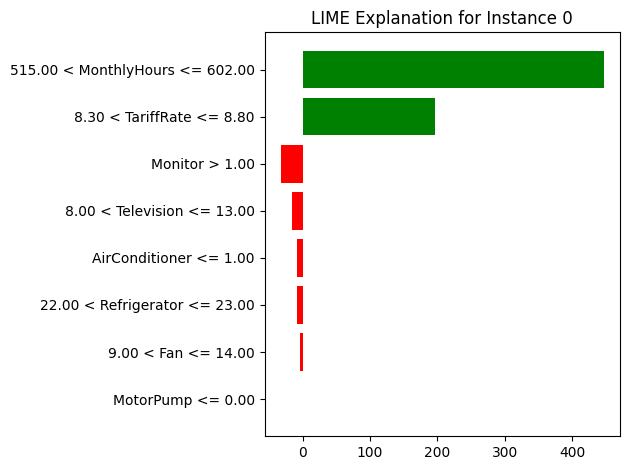

<Figure size 640x480 with 0 Axes>

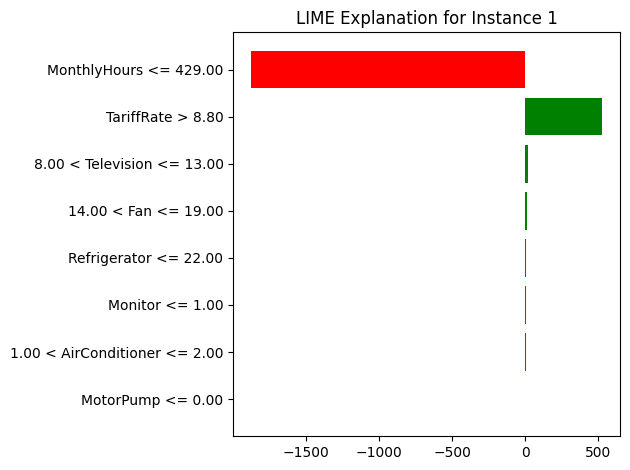

<Figure size 640x480 with 0 Axes>

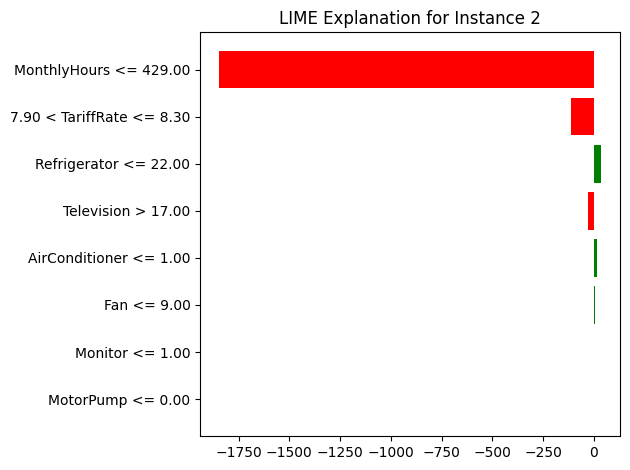

In [ ]:
import matplotlib.pyplot as plt

for i, explanation in enumerate(detailed_explanations):
    # Add a title to the plot
    plt.figure() # Create a new figure for each plot
    explanation.as_pyplot_figure()
    plt.title(f"LIME Explanation for Instance {instance_indices[i]}")
    plt.tight_layout() # Adjust layout to prevent overlapping
    plt.show()


# **Question 2**

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/fraud_oracle.csv')
df

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15415,Nov,4,Friday,Toyota,Urban,Tuesday,Nov,5,Male,Married,...,6 years,31 to 35,No,No,External,none,no change,1 vehicle,1996,Collision
15416,Nov,5,Thursday,Pontiac,Urban,Friday,Dec,1,Male,Married,...,6 years,31 to 35,No,No,External,more than 5,no change,3 to 4,1996,Liability
15417,Nov,5,Thursday,Toyota,Rural,Friday,Dec,1,Male,Single,...,5 years,26 to 30,No,No,External,1 to 2,no change,1 vehicle,1996,Collision
15418,Dec,1,Monday,Toyota,Urban,Thursday,Dec,2,Female,Married,...,2 years,31 to 35,No,No,External,more than 5,no change,1 vehicle,1996,All Perils


In [ ]:
target_col = 'FraudFound_P'
feature_cols = [col for col in df.columns if col not in [target_col, 'PolicyType', 'VehicleCategory', 'PolicyReportedDate', 'Year']]

print(f"Target column: {target_col}")
print(f"Feature columns: {feature_cols}")

Target column: FraudFound_P
Feature columns: ['Month', 'WeekOfMonth', 'DayOfWeek', 'Make', 'AccidentArea', 'DayOfWeekClaimed', 'MonthClaimed', 'WeekOfMonthClaimed', 'Sex', 'MaritalStatus', 'Age', 'Fault', 'VehiclePrice', 'PolicyNumber', 'RepNumber', 'Deductible', 'DriverRating', 'Days_Policy_Accident', 'Days_Policy_Claim', 'PastNumberOfClaims', 'AgeOfVehicle', 'AgeOfPolicyHolder', 'PoliceReportFiled', 'WitnessPresent', 'AgentType', 'NumberOfSuppliments', 'AddressChange_Claim', 'NumberOfCars', 'BasePolicy']


In [ ]:
from sklearn.model_selection import train_test_split

X = df[feature_cols]
y = df[target_col]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (12336, 29)
Shape of X_test: (3084, 29)
Shape of y_train: (12336,)
Shape of y_test: (3084,)


In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

# Identify categorical columns
categorical_features = X_train.select_dtypes(include=['object']).columns

# Create a ColumnTransformer to apply one-hot encoding to categorical features
preprocessor = ColumnTransformer(
    transformers=[('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)],
    remainder='passthrough' # Keep other columns (numerical) as they are
)

# Create a pipeline that first preprocesses the data and then trains the RandomForestClassifier
rf_model_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                    ('classifier', RandomForestClassifier(random_state=42))])

# Train the model using the training data with the pipeline
rf_model_pipeline.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['Month', 'DayOfWeek', 'Make', 'AccidentArea', 'DayOfWeekClaimed',
       'MonthClaimed', 'Sex', 'MaritalStatus', 'Fault', 'VehiclePrice',
       'Days_Policy_Accident', 'Days_Policy_Claim', 'PastNumberOfClaims',
       'AgeOfVehicle', 'AgeOfPolicyHolder', 'PoliceReportFiled',
       'WitnessPresent', 'AgentType', 'NumberOfSuppliments',
       'AddressChange_Claim', 'NumberOfCars', 'BasePolicy'],
      dtype='object'))])),
                ('classifier', RandomForestClassifier(random_state=42))])

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Make predictions on the test set
y_pred = rf_model_pipeline.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Generate classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

Accuracy: 0.9361

Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      2887
           1       0.00      0.00      0.00       197

    accuracy                           0.94      3084
   macro avg       0.47      0.50      0.48      3084
weighted avg       0.88      0.94      0.91      3084


Confusion Matrix:
[[2887    0]
 [ 197    0]]


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


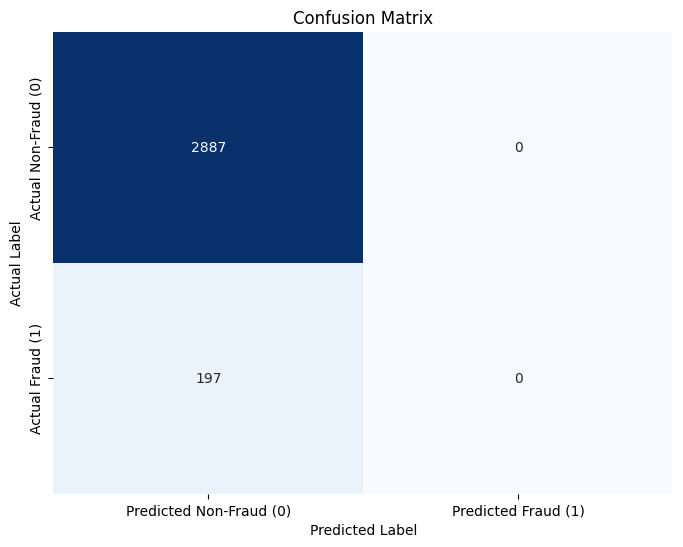

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Generate confusion matrix (already calculated in the previous step, but recalculating for completeness)
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Non-Fraud (0)', 'Predicted Fraud (1)'],
            yticklabels=['Actual Non-Fraud (0)', 'Actual Fraud (1)'])
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

/tmp/ipython-input-2619153775.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=target_col, data=df, palette='viridis')


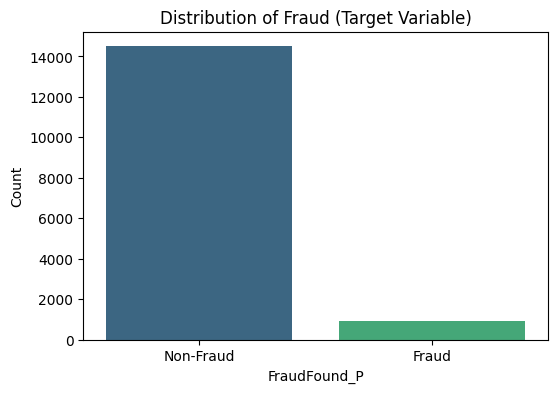

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of the target variable
plt.figure(figsize=(6, 4))
sns.countplot(x=target_col, data=df, palette='viridis')
plt.title('Distribution of Fraud (Target Variable)')
plt.xlabel('FraudFound_P')
plt.ylabel('Count')
plt.xticks([0, 1], ['Non-Fraud', 'Fraud'])
plt.show()